<a href="https://colab.research.google.com/github/Mweru/Bank-Marketing-Data-Analysis/blob/main/Bank_Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Business Understanding
This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution sourced from [Kaggle](https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set/data). The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

## Problem statement

Term deposits are cash investment held at a financial institution and are a major source of revenue for banks, making them important for financial institutions to market. Telemarketing remains to be a popular marketing technique because of the potential effectiveness of human contact provided by a telephone call. However, executing such direct marketing effort usually requires a huge investment by the business as large call centers need to be contracted to contact clients directly.

## Objectives
Use this data set to test the performance of your classification models and to explore the best strategies to improve a banking institution's next direct marketing campaign.

Analyze this data set and identify the patterns that will help us develop future strategies & To answer the question; How can the banking institution have more effective direct marketing campaigns in the future?



# Data Understanding & Data Cleaning
Specific details about the dataset columns and values can be found in the [Data Report](https://docs.google.com/document/d/1X5978wftiwQ_1Ef9aMhId56umDE_R8Ha-ipip15CuPI/edit?usp=sharing) found in this Repository.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and previewing the data
data = pd.read_csv('bank-direct-marketing-campaigns.csv')
df = data.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#checking the number of rows and columns
print(f"The dataset contains the following rows & columns respectively: {df.shape}")

The dataset contains the following rows & columns respectively: (41188, 20)


### Handling duplicates and Missing values

In [4]:
#checking for duplicates
print(f"The Number of duplicates are: {df.duplicated().sum()}")

The Number of duplicates are: 1784


In [5]:
#dropping the duplicates
df = df.drop_duplicates()
print(f"The Number of duplicates after dropping is: {df.duplicated().sum()}")

The Number of duplicates after dropping is: 0


In [6]:
#checking for missing values
print(f"The Number of missing values is: {df.isna().sum().sum()}")

The Number of missing values is: 0


In [7]:
#checking the value counts for columns in search for placeholders since there are no missing values
for column in df.columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print()

Value counts for column 'age':
age
31    1825
32    1764
33    1741
35    1671
36    1670
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

Value counts for column 'job':
job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     23869
single      10997
divorced     4459
unknown        79
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: count, dtype: int64

Value counts for column 'defaul

From the value counts above, we observe that the columns `pdays`, `previous` and `poutcome` each contain only a single unique value across all records:
- pdays = 999.0, which typically indicates that the client was not previously contacted.
- previous = 0.0, showing that the client had zero previous contacts during earlier campaigns.
- poutcome = 'nonexistent', meaning there is no outcome recorded from a previous campaign.

This suggests that all clients in the dataset had not been contacted in any previous marketing campaigns, and as such, these features provide no variability or predictive value in their current state.

we will therefore drop those columns.

We also observe that, besides the missing values a placeholder `unknown` is used in several columns. We will maintain this for now.

In [8]:
#preview of the data after cleaning
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
#exporting the cleaned data for further visualization
df.to_csv('bank-direct-marketing-campaigns-cleaned.csv', index=False)

## Explorative Data Analysis
View [my Dashboard here](https://powerbi.microsoft.com/)

**What is the distribution of the rate of term deposit subscription?**

In [10]:
fig = px.pie(df, names='y', title='Distribution of Term Deposit Subscription')
fig.show()

From the piechart above, we see that our dataset target variable is clearly imbalanced and is skewed towards `No` subscription outcome.

**What are the top marketing campaigns that resulted in the highest number of client subscriptions? and which ones had the highest number of non-subscriptions?**

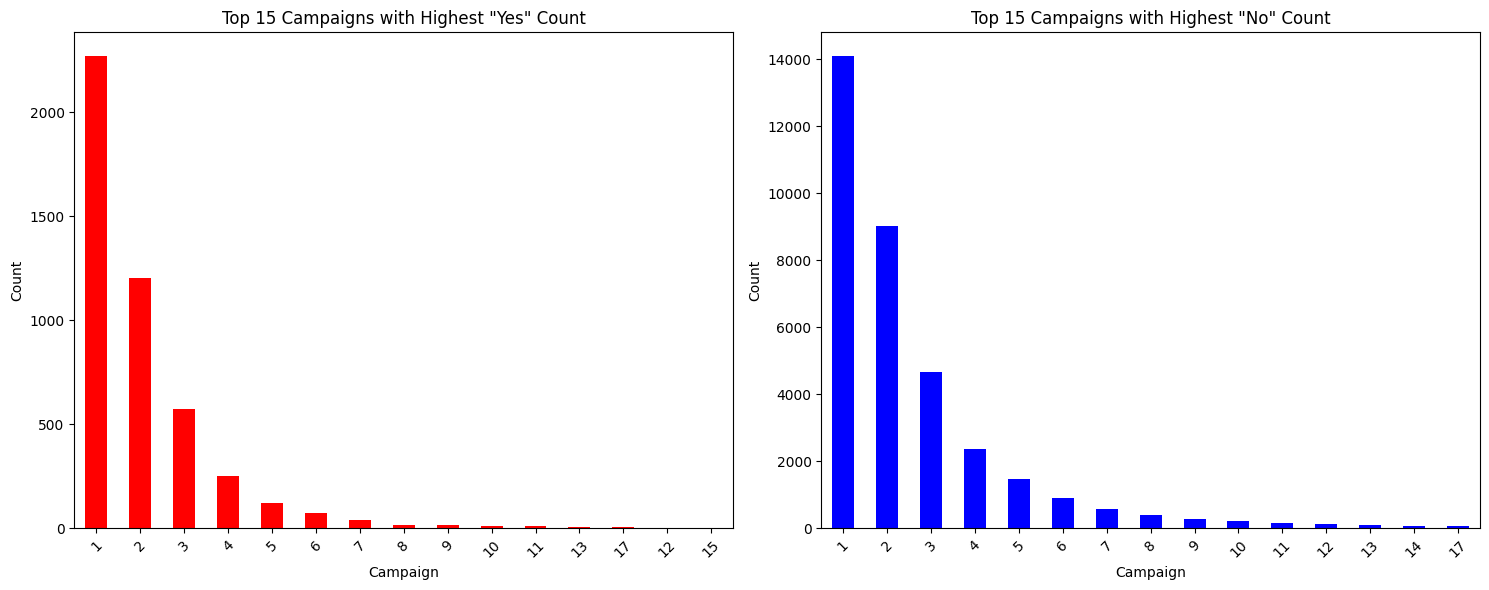

In [11]:
campaign_counts = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)

top_yes = campaign_counts['yes'].nlargest(15)
top_no = campaign_counts['no'].nlargest(15)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_yes.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Top 15 Campaigns with Highest "Yes" Count')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_yes.index, rotation=45)

top_no.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Top 15 Campaigns with Highest "No" Count')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_no.index, rotation=45)

plt.tight_layout()
plt.show()

#### Categorical Variable Analysis
Below we visualize and see how the categorical variables impact the target(y)

1. **Does the kind of `job` relate to the subscription outcome: `y`**

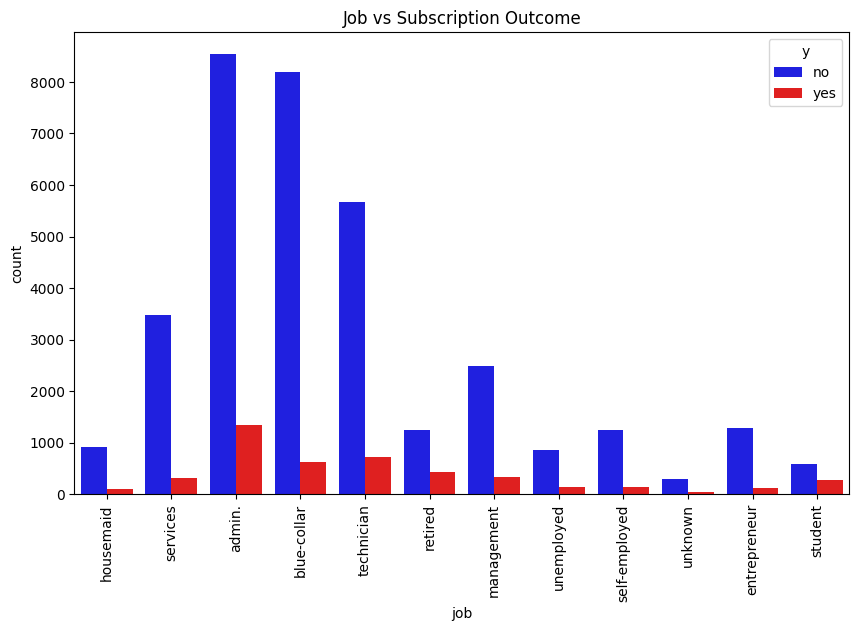

In [12]:
plt.figure(figsize=(10, 6))
red_blue_palette = sns.color_palette(["blue", "red"])
sns.countplot(x='job', hue='y', data=df, palette=red_blue_palette)
plt.title('Job vs Subscription Outcome')
plt.xticks(rotation=90)
plt.show()

**What is the effect of `age` on the subscription outcome `y`, and are there specific age groups that are more likely to respond positively to marketing campaigns?**

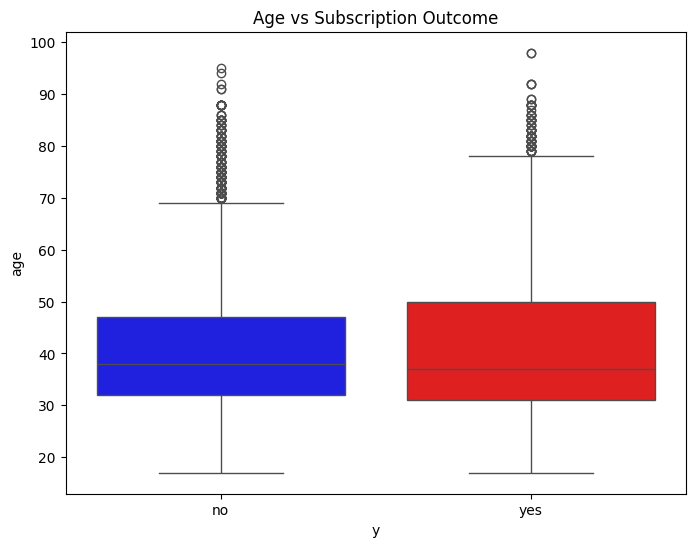

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', hue='y', data=df, palette=red_blue_palette)
plt.title('Age vs Subscription Outcome')
plt.show()

**How do `housing` and personal `loan` statuses (as categorical variables) relate to the subscription outcome `y`?** Can a heatmap reveal patterns in how the presence or absence of these loans influences the likelihood of a positive campaign response?

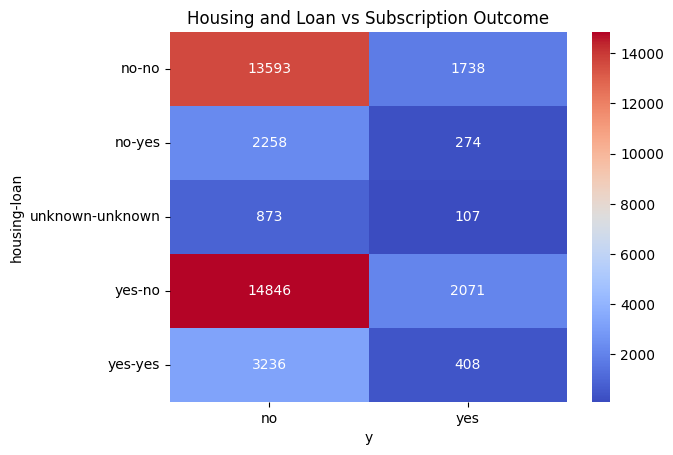

In [14]:
housing_loan_df = pd.crosstab([df['housing'], df['loan']], df['y'])
sns.heatmap(housing_loan_df, annot=True, cmap='coolwarm', fmt='d')
plt.title('Housing and Loan vs Subscription Outcome')
plt.show()

**How do the `contact` method and the `month` of contact influence the success rate of marketing campaigns?**

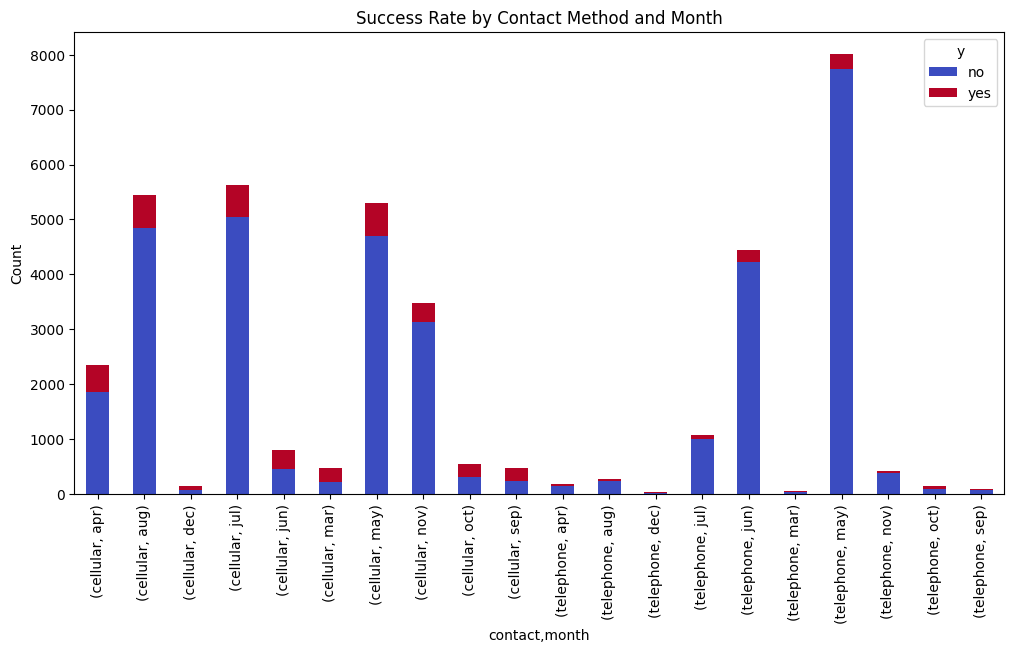

In [15]:
contact_month_df = df.groupby(['contact', 'month', 'y']).size().unstack().fillna(0)
contact_month_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Success Rate by Contact Method and Month')
plt.ylabel('Count')
plt.show()

**How does the number of contacts during the campaign `campaign` affect the success rate, and what role do related metrics like pdays and previous play in influencing client responses?**

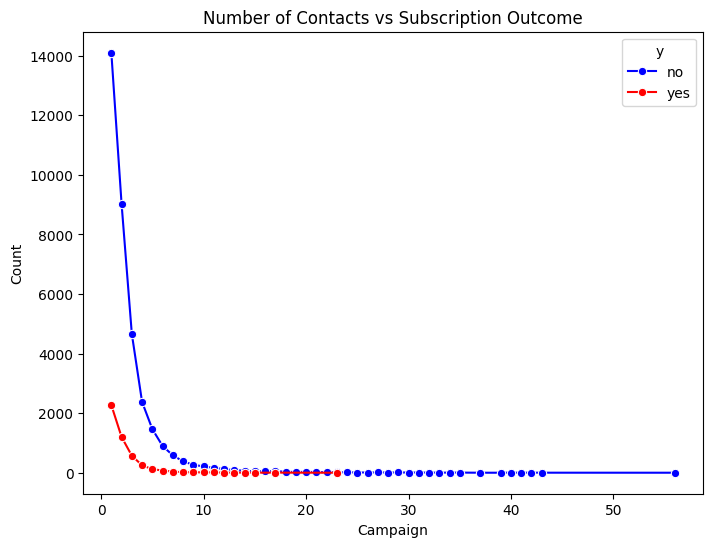

In [16]:
count_data = df.groupby(['campaign', 'y']).size().reset_index(name='count')
plt.figure(figsize=(8, 6))

sns.lineplot(data=count_data, x='campaign', y='count', hue='y', palette=red_blue_palette, marker="o")

plt.title('Number of Contacts vs Subscription Outcome')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()

**How do `marital` status and `education` level influence the subscription outcome `y`?** Can a stacked or grouped bar chart reveal whether certain groups are more likely to respond positively to marketing campaigns?

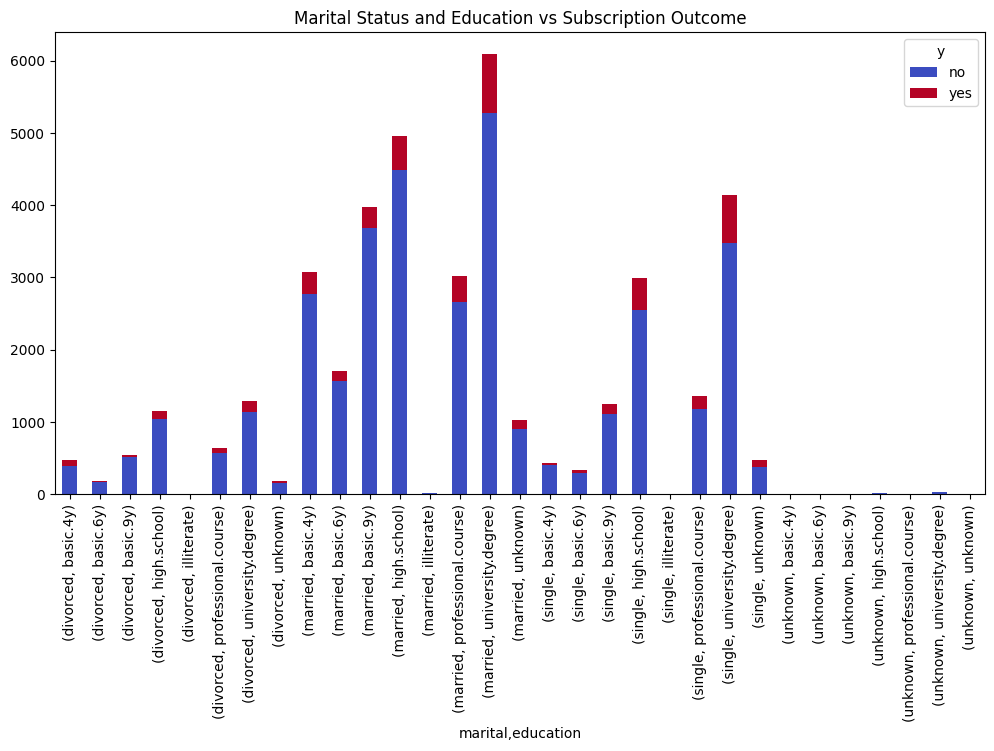

In [17]:
marital_education_df = pd.crosstab([df['marital'], df['education']], df['y'])
marital_education_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Marital Status and Education vs Subscription Outcome')
plt.show()

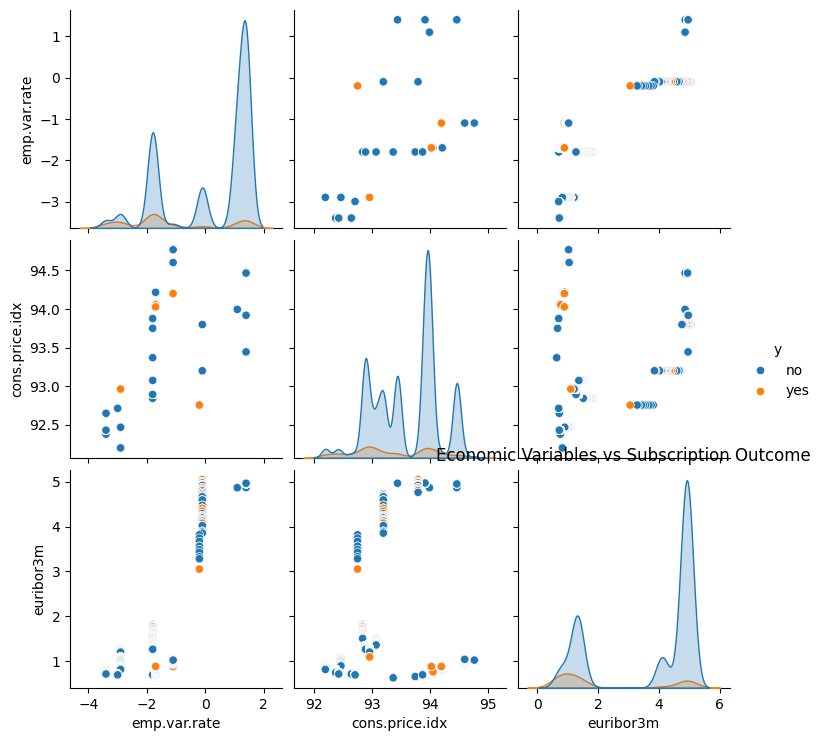

In [18]:
sns.pairplot(df[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'y']], hue='y')
plt.title('Economic Variables vs Subscription Outcome')
plt.show()

Below is a **Correlation Heatmap** for the numeric columns which will help us identify which numerical features are highly correlated with each other or with the target variable (y).

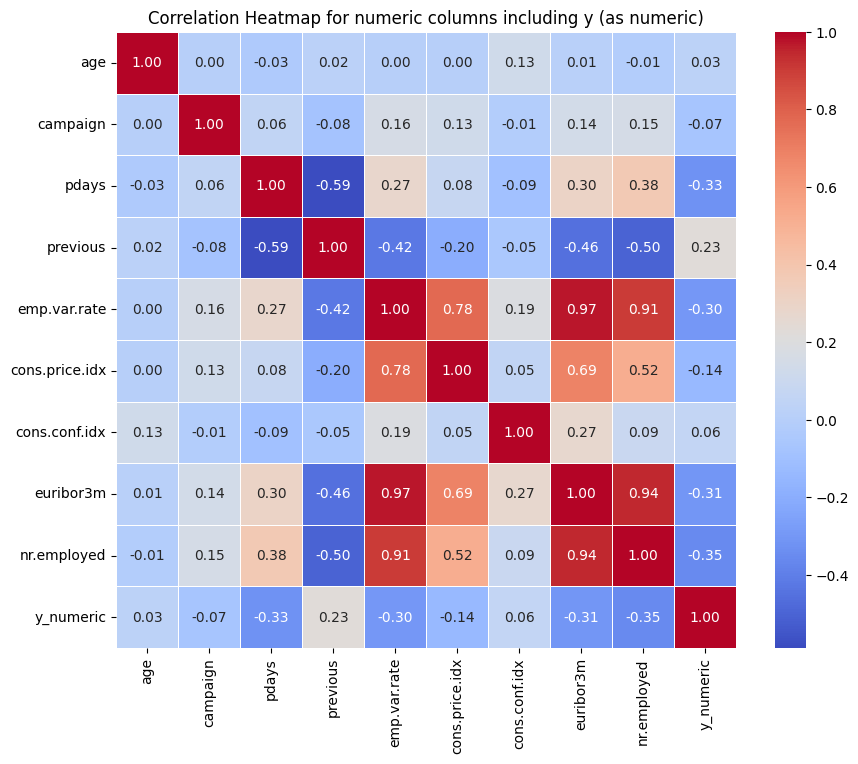

In [19]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['number'])
numeric_df['y_numeric'] = df['y_numeric']

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for numeric columns including y (as numeric)')
plt.show()

## Feature Selection and Feature Engineering

In [20]:
#Convert `y` to Binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [21]:
# dropping columns pdays, previous and poutcome since they are irrelevant
df = df.drop(['pdays', 'previous', 'poutcome'], axis=1)

columns `euribor3m`, `emp-var-rate` and `nr-employed` are highly correlated, therefore we'll drop `emp-var-rate` and `nr-employed`

In [22]:
# dropping two of the highly correlated columns
df.drop(['emp.var.rate', 'nr.employed'], axis=1, inplace=True)

### Data Preprocessing

In [23]:
#defining numerical and categorical features
numerical = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']

In [24]:
#preprocessing tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

We will use `StandardScaler()` for scaling the numerical features and `OneHotEncoder()` to encode our categorical columns into numeric then create a preprocessing pipeline

In [25]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical),('cat', categorical_transformer, categorical)])

In [26]:
#prepare the features and target
X = df.drop('y', axis=1)
y = df['y']

In [27]:
#split the data into train and tests splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modeling and Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    score = pipeline.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

Logistic Regression Accuracy: 0.8899
Decision Tree Accuracy: 0.8349
Random Forest Accuracy: 0.8849
XGBoost Accuracy: 0.8909


In [30]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6961
           1       0.58      0.20      0.29       920

    accuracy                           0.89      7881
   macro avg       0.74      0.59      0.62      7881
weighted avg       0.87      0.89      0.86      7881


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6961
           1       0.30      0.33      0.31       920

    accuracy                           0.83      7881
   macro avg       0.61      0.61      0.61      7881
weighted avg       0.84      0.83      0.84      7881


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6961
           1       0.51      0.27      0.35       920

    accuracy                           0.88      7881
   macro

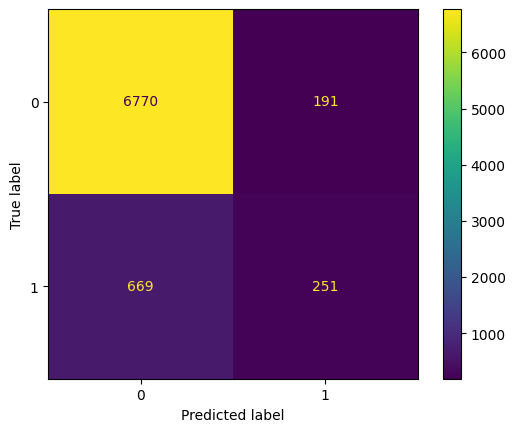

In [31]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test);

### Addressing class imbalance
we'll use SMOTE on XGBoost model and Random Forest Model

In [32]:
smote = SMOTE(random_state=42)

xgb_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('model', XGBClassifier(eval_metric='logloss'))
])

xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

rf_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('model', RandomForestClassifier(class_weight=None))
])

rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

Let's plot an ROC curve for both models to see which one performs better

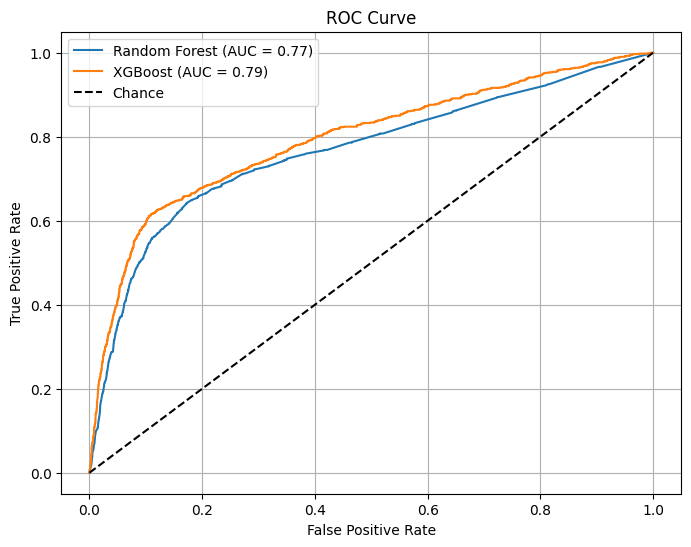

In [33]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {auc(xgb_fpr, xgb_tpr):.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True);

Threshhold tuning

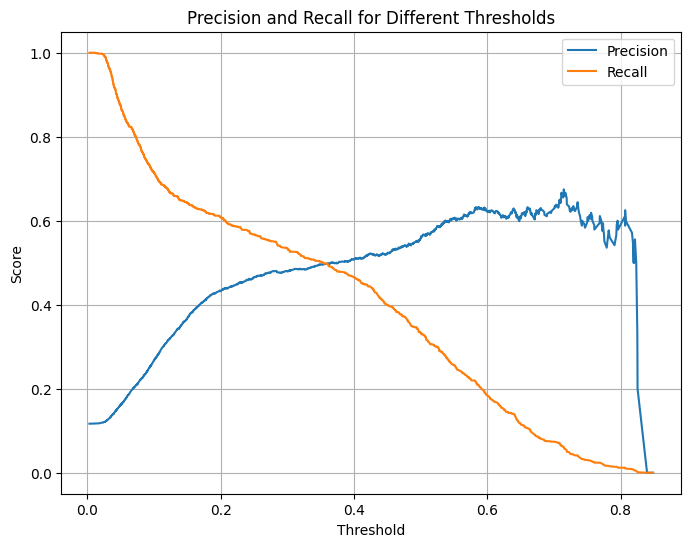

In [34]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.4, 0.3, 0.2]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True);

In [35]:
# Find index where precision and recall are closest
diff = np.abs(precisions - recalls)
best_index = np.argmin(diff)
best_thresh = thresholds[best_index]

print(f"Best threshold (Precision ≈ Recall): {best_thresh:.2f}")

Best threshold (Precision ≈ Recall): 0.36


In [36]:
y_pred_adjusted = (y_probs >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6961
           1       0.50      0.50      0.50       920

    accuracy                           0.88      7881
   macro avg       0.72      0.72      0.72      7881
weighted avg       0.88      0.88      0.88      7881



## Deployment

In [37]:
#Saving the trained model to a .pkl file
import joblib
joblib.dump(xgb_model, 'final_model_pipeline.pkl')

['final_model_pipeline.pkl']